# 1 FEATURE , PAST 27 YEAR , NEXT DAY PREDICTION WINDO SIZE=100

In [171]:
"""
JUST CHANGE data[feature] : feature with tmin,tmax,tavg 
                            and change Scaler with Standard Scaler and MinMax Scaler
                            remain all other code same 

And You wil get result as i got which i mentioned in All model evalution portion.

"""

'\nJUST CHANGE data[feature] : feature with tmin,tmax,tavg \n                            and change Scaler with Standard Scaler and MinMax Scaler\n                            remain all other code same \n\nAnd You wil get result as i got which i mentioned in All model evalution portion.\n\n'

In [4]:
!pip install meteostat

/usr/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout,Flatten,BatchNormalization
from sklearn.preprocessing import MinMaxScaler
import pandas as pd


In [6]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="jainam")

# Example city
city = "Ahmedabad, India"

location = geolocator.geocode(city)

if location:
    print(f"City: {city}")
    print(f"Latitude: {location.latitude}, Longitude: {location.longitude}")
else:
    print(f"Could not find coordinates for {city}")


City: Ahmedabad, India
Latitude: 23.0215374, Longitude: 72.5800568


In [56]:
def plot_loss_curves(history):
    """
    Plots the loss curves of a model
    """
    loss = history['loss']
    val_loss = history['val_loss']

    accuracy = history['mae']
    val_accuracy = history['val_mae']

    epochs = range(len(history['loss']))


    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

In [84]:
from meteostat import Point, Hourly
import datetime


location = Point( 23.0215374, 72.5800568)
start = datetime.datetime(1990, 6, 1)
end = datetime.datetime(2024, 6, 1)

# Get historical data
data = Hourly(location, start, end)
data = data.fetch()

print(data)


                     temp  dwpt  rhum  prcp  snow   wdir  wspd  wpgt    pres  \
time                                                                           
1990-06-01 00:00:00  25.4  23.8  91.0   NaN   NaN  230.0  11.2   NaN  1002.5   
1990-06-01 01:00:00   NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN     NaN   
1990-06-01 02:00:00   NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN     NaN   
1990-06-01 03:00:00  29.4  23.6  71.0   NaN   NaN  320.0  18.4   NaN  1004.2   
1990-06-01 04:00:00   NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN     NaN   
...                   ...   ...   ...   ...   ...    ...   ...   ...     ...   
2024-05-31 20:00:00  32.0  24.1  63.0   0.0   NaN  250.0  13.0   NaN  1003.0   
2024-05-31 21:00:00  32.6  24.4  62.0   0.0   NaN  250.0   7.6   NaN  1002.8   
2024-05-31 22:00:00  31.0  22.1  59.0   0.0   NaN  210.0  22.3   NaN  1003.0   
2024-05-31 23:00:00  30.0  21.9  62.0   0.0   NaN  210.0  14.8   NaN  1003.0   
2024-06-01 00:00:00  31.0  23.1  63.0   

In [85]:
print(data.shape)

(298057, 11)


In [86]:
temperature_avg=data["temp"]

In [87]:
print("TOTAL NULL VALUES IN DATASET:",temperature_avg.isnull().sum())

TOTAL NULL VALUES IN DATASET: 150410


In [88]:
temperature_avg.dropna(inplace=True)

In [89]:
temperature_avg.describe()

count    147647.000000
mean         27.703418
std           6.452841
min           4.200000
25%          24.000000
50%          28.000000
75%          32.000000
max          50.000000
Name: temp, dtype: float64

In [90]:
temperature_avg.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 147647 entries, 1990-06-01 00:00:00 to 2024-06-01 00:00:00
Series name: temp
Non-Null Count   Dtype  
--------------   -----  
147647 non-null  float64
dtypes: float64(1)
memory usage: 2.3 MB


In [91]:
temperature_avg_seq=temperature_avg.values
print(temperature_avg_seq,temperature_avg_seq.shape)

[25.4 29.4 33.4 ... 31.  30.  31. ] (147647,)


In [95]:

window_size=100

X=[]
Y=[]
for i in range(len(temperature_avg_seq)-window_size):
  X.append(temperature_avg_seq[i:i+window_size])
  Y.append(temperature_avg_seq[i+window_size])

In [96]:
X=np.array(X)
Y=np.array(Y)

In [97]:
print("X Shape",X.shape)
print("Y Shape",Y.shape)


X Shape (147547, 100)
Y Shape (147547,)


In [98]:
X

array([[25.4, 29.4, 33.4, ..., 29.4, 30.6, 34.6],
       [29.4, 33.4, 34.2, ..., 30.6, 34.6, 40.6],
       [33.4, 34.2, 30. , ..., 34.6, 40.6, 37. ],
       ...,
       [33.6, 32. , 31. , ..., 32. , 32. , 32.6],
       [32. , 31. , 31.6, ..., 32. , 32.6, 31. ],
       [31. , 31.6, 30. , ..., 32.6, 31. , 30. ]])

In [99]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [100]:
print("X_train Shape",X_train.shape)
print("X_test Shape",X_test.shape)
print("Y_train Shape",Y_train.shape)
print("Y_test Shape",Y_test.shape)


X_train Shape (103282, 100)
X_test Shape (44265, 100)
Y_train Shape (103282,)
Y_test Shape (44265,)


In [106]:
X_train

array([[ 0.20080145,  0.04584215, -0.10911716, ..., -0.10911716,
        -0.01614158, -0.41903576],
       [ 1.56444331,  0.88262238,  0.72766308, ...,  0.35576075,
         0.20080145,  0.51072005],
       [-1.50375088, -0.17110088,  0.32476889, ..., -0.69796251,
         0.75865494,  0.85163052],
       ...,
       [-0.0781253 ,  0.04584215,  0.20080145, ...,  0.51072005,
         0.66567936,  0.6346875 ],
       [ 1.44047587,  1.28551657,  1.28551657, ...,  1.28551657,
         0.9446061 ,  0.66567936],
       [ 0.51072005,  0.51072005,  0.44873633, ...,  0.35576075,
         0.51072005,  0.35576075]])

In [102]:
from sklearn.preprocessing import StandardScaler
MinMax=StandardScaler()
X_train_Scaled=MinMax.fit_transform(X_train.reshape(-1,1))
X_test_Scaled=MinMax.transform(X_test.reshape(-1,1))

In [103]:
X_train=X_train_Scaled.reshape(X_train.shape[0],100)

In [104]:
X_test=X_test_Scaled.reshape(X_test.shape[0],100)

In [105]:
print("X_train Shape",X_train.shape)
print("X_test Shape",X_test.shape)
print("Y_train Shape",Y_train.shape)
print("Y_test Shape",Y_test.shape)


X_train Shape (103282, 100)
X_test Shape (44265, 100)
Y_train Shape (103282,)
Y_test Shape (44265,)


In [107]:
maxLength=6
upgraded_naive_model=Sequential()
upgraded_naive_model.add(LSTM(128,return_sequences=True,input_shape=(window_size,1)))
upgraded_naive_model.add(Dropout(0.2))
upgraded_naive_model.add(LSTM(100,return_sequences=True))
upgraded_naive_model.add(Dropout(0.2))
upgraded_naive_model.add(LSTM(100,return_sequences=True))
upgraded_naive_model.add(Dropout(0.2))
upgraded_naive_model.add(LSTM(100))
upgraded_naive_model.add(Dropout(0.2))

upgraded_naive_model.add(Dense(128,activation="relu"))
upgraded_naive_model.add(Dropout(0.2))


upgraded_naive_model.add(Dense(1))


In [108]:
upgraded_naive_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 100)            │          91,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100, 100)            │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 100, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          12,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 332,017 (1.27 MB)

 Trainable params: 332,017 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

In [112]:
upgraded_naive_model.compile(optimizer="adam",loss="mse",metrics=["mae"])

In [113]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(
    "temperature_best_Standard_Hourly.keras",
    monitor = "val_loss",
    mode = "min",
    save_best_only = True,
    verbose = 1
)

In [110]:
X_test.shape, Y_test.shape

((44265, 100), (44265,))

In [114]:
history=upgraded_naive_model.fit(np.array(X_train).reshape(-1,window_size,1),Y_train,epochs=10,batch_size=16,validation_data=(X_test,Y_test),callbacks=[checkpoint])

Epoch 1/10
6455/6456 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 48.7040 - mae: 5.0435
Epoch 1: val_loss improved from inf to 3.49655, saving model to temperature_best_Standard_Hourly.keras
6456/6456 ━━━━━━━━━━━━━━━━━━━━ 130s 20ms/step - loss: 48.6968 - mae: 5.0431 - val_loss: 3.4965 - val_mae: 1.3250
Epoch 2/10
6454/6456 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 8.1366 - mae: 2.2124
Epoch 2: val_loss improved from 3.49655 to 3.23514, saving model to temperature_best_Standard_Hourly.keras
6456/6456 ━━━━━━━━━━━━━━━━━━━━ 126s 19ms/step - loss: 8.1364 - mae: 2.2123 - val_loss: 3.2351 - val_mae: 1.3455
Epoch 3/10
6453/6456 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 6.3896 - mae: 1.9385
Epoch 3: val_loss improved from 3.23514 to 2.71883, saving model to temperature_best_Standard_Hourly.keras
6456/6456 ━━━━━━━━━━━━━━━━━━━━ 126s 20ms/step - loss: 6.3894 - mae: 1.9385 - val_loss: 2.7188 - val_mae: 1.1734
Epoch 4/10
6455/6456 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5.6664 - mae: 1.8162
Epoch 4: 

In [116]:
history1=best_model.fit(np.array(X_train).reshape(-1,window_size,1),Y_train,epochs=10,batch_size=16,validation_data=(X_test,Y_test),callbacks=[checkpoint])

Epoch 1/10
6454/6456 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.2440 - mae: 1.5445
Epoch 1: val_loss did not improve from 2.25635
6456/6456 ━━━━━━━━━━━━━━━━━━━━ 131s 20ms/step - loss: 4.2440 - mae: 1.5445 - val_loss: 2.4191 - val_mae: 1.0671
Epoch 2/10
6455/6456 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.1861 - mae: 1.5309
Epoch 2: val_loss did not improve from 2.25635
6456/6456 ━━━━━━━━━━━━━━━━━━━━ 126s 20ms/step - loss: 4.1861 - mae: 1.5309 - val_loss: 2.5258 - val_mae: 1.0930
Epoch 3/10
6455/6456 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.0692 - mae: 1.5104
Epoch 3: val_loss did not improve from 2.25635
6456/6456 ━━━━━━━━━━━━━━━━━━━━ 126s 19ms/step - loss: 4.0692 - mae: 1.5104 - val_loss: 2.7518 - val_mae: 1.1440
Epoch 4/10
6453/6456 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.9002 - mae: 1.4689
Epoch 4: val_loss did not improve from 2.25635
6456/6456 ━━━━━━━━━━━━━━━━━━━━ 125s 19ms/step - loss: 3.9002 - mae: 1.4689 - val_loss: 2.2948 - val_mae: 1.0239
Epoch 5/10
6454/6456 ━━━━━━━

In [121]:
history2=best_model.fit(np.array(X_train).reshape(-1,window_size,1),Y_train,epochs=10,batch_size=16,validation_data=(X_test,Y_test),callbacks=[checkpoint])

Epoch 1/10
6455/6456 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.3219 - mae: 1.3413
Epoch 1: val_loss did not improve from 2.05785
6456/6456 ━━━━━━━━━━━━━━━━━━━━ 127s 19ms/step - loss: 3.3219 - mae: 1.3413 - val_loss: 2.0865 - val_mae: 0.9611
Epoch 2/10
6456/6456 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.2334 - mae: 1.3140
Epoch 2: val_loss did not improve from 2.05785
6456/6456 ━━━━━━━━━━━━━━━━━━━━ 124s 19ms/step - loss: 3.2334 - mae: 1.3140 - val_loss: 2.1414 - val_mae: 0.9874
Epoch 3/10
6453/6456 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.1433 - mae: 1.2979
Epoch 3: val_loss did not improve from 2.05785
6456/6456 ━━━━━━━━━━━━━━━━━━━━ 124s 19ms/step - loss: 3.1433 - mae: 1.2979 - val_loss: 2.1357 - val_mae: 0.9919
Epoch 4/10
6454/6456 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2.9961 - mae: 1.2648
Epoch 4: val_loss did not improve from 2.05785
6456/6456 ━━━━━━━━━━━━━━━━━━━━ 124s 19ms/step - loss: 2.9961 - mae: 1.2648 - val_loss: 2.3734 - val_mae: 1.0690
Epoch 5/10
6454/6456 ━━━━━━━

In [39]:
history3=best_model.fit(np.array(X_train).reshape(-1,window_size,1),Y_train,epochs=10,batch_size=16,validation_data=(X_test,Y_test),callbacks=[checkpoint])

Epoch 1/10
6453/6456 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.2378 - mae: 1.3185
Epoch 1: val_loss did not improve from 2.16284
6456/6456 ━━━━━━━━━━━━━━━━━━━━ 130s 20ms/step - loss: 3.2378 - mae: 1.3185 - val_loss: 2.2725 - val_mae: 1.0503
Epoch 2/10
6454/6456 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.1884 - mae: 1.2996
Epoch 2: val_loss did not improve from 2.16284
6456/6456 ━━━━━━━━━━━━━━━━━━━━ 125s 19ms/step - loss: 3.1883 - mae: 1.2996 - val_loss: 2.4445 - val_mae: 1.0838
Epoch 3/10
6454/6456 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.0457 - mae: 1.2752
Epoch 3: val_loss improved from 2.16284 to 2.14195, saving model to temperature_best_MinMax_Hourly.keras
6456/6456 ━━━━━━━━━━━━━━━━━━━━ 126s 19ms/step - loss: 3.0457 - mae: 1.2752 - val_loss: 2.1419 - val_mae: 0.9787
Epoch 4/10
6455/6456 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.1228 - mae: 1.2808
Epoch 4: val_loss improved from 2.14195 to 2.12098, saving model to temperature_best_MinMax_Hourly.keras
6456/6456 ━━━━━━━━━━━━━━

In [123]:
history4=best_model.fit(np.array(X_train).reshape(-1,window_size,1),Y_train,epochs=10,batch_size=16,validation_data=(X_test,Y_test),callbacks=[checkpoint])

Epoch 1/10
6454/6456 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2.7579 - mae: 1.1967
Epoch 1: val_loss did not improve from 2.03834
6456/6456 ━━━━━━━━━━━━━━━━━━━━ 128s 19ms/step - loss: 2.7579 - mae: 1.1967 - val_loss: 2.1967 - val_mae: 0.9960
Epoch 2/10
6453/6456 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2.7206 - mae: 1.1873
Epoch 2: val_loss did not improve from 2.03834
6456/6456 ━━━━━━━━━━━━━━━━━━━━ 125s 19ms/step - loss: 2.7206 - mae: 1.1873 - val_loss: 2.0554 - val_mae: 0.9492
Epoch 3/10
6454/6456 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2.6508 - mae: 1.1675
Epoch 3: val_loss did not improve from 2.03834
6456/6456 ━━━━━━━━━━━━━━━━━━━━ 124s 19ms/step - loss: 2.6508 - mae: 1.1675 - val_loss: 2.1500 - val_mae: 0.9893
Epoch 4/10
6454/6456 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2.6303 - mae: 1.1666
Epoch 4: val_loss did not improve from 2.03834
6456/6456 ━━━━━━━━━━━━━━━━━━━━ 125s 19ms/step - loss: 2.6303 - mae: 1.1666 - val_loss: 2.0432 - val_mae: 0.9477
Epoch 5/10
6455/6456 ━━━━━━━

In [124]:
final_history={}

for key in history.history.keys():
    final_history[key]=history.history[key]+history1.history[key]+history2.history[key]+history3.history[key]+history4.history[key]


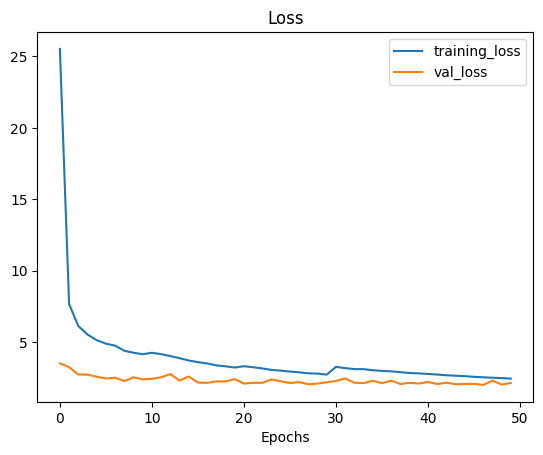

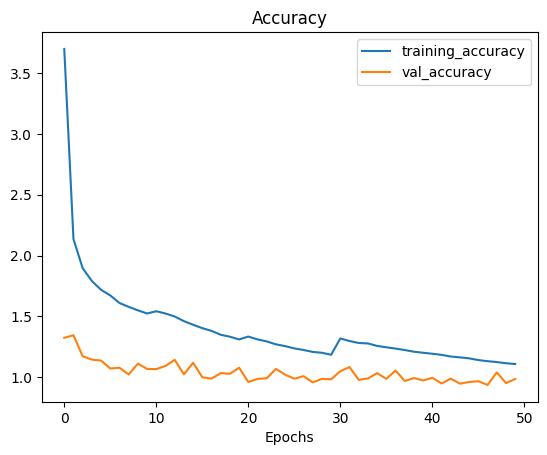

In [125]:
plot_loss_curves(final_history)

In [126]:
from tensorflow.keras.models import load_model
best_model=load_model("/kaggle/working/temperature_best_Standard_Hourly.keras")
# best_model.save("upgraded_naive_model_best_avg.h5")


In [127]:
from meteostat import Point, Hourly
import datetime


location = Point( 23.0215374, 72.5800568)
start = datetime.datetime(2024, 6, 1)
end = datetime.datetime(2024, 6, 3)

# Get historical data
data = Hourly(location, start, end)
data = data.fetch()

print(data)


                     temp  dwpt  rhum  prcp  snow   wdir  wspd  wpgt    pres  \
time                                                                           
2024-06-01 00:00:00  31.0  23.1  63.0   0.0   NaN  230.0   5.4   NaN  1003.5   
2024-06-01 01:00:00  30.0  21.9  62.0   0.0   NaN  210.0  18.4   NaN  1004.0   
2024-06-01 02:00:00  31.0  22.1  59.0   0.0   NaN  210.0  18.4   NaN  1005.0   
2024-06-01 03:00:00  33.2  24.4  60.0   0.0   NaN  200.0   5.4   NaN  1005.7   
2024-06-01 04:00:00  32.0  22.1  56.0   0.0   NaN  200.0  14.8   NaN  1006.0   
2024-06-01 05:00:00  34.0  21.1  47.0   0.0   NaN  200.0  20.5   NaN  1005.0   
2024-06-01 06:00:00  37.4  23.1  44.0   0.0   NaN  200.0   5.4   NaN  1005.5   
2024-06-01 07:00:00  36.0  19.9  39.0   0.0   NaN  200.0  16.6   NaN  1004.0   
2024-06-01 08:00:00  38.0  18.9  33.0   0.0   NaN  200.0  18.4   NaN  1003.0   
2024-06-01 09:00:00  40.5  21.6  34.0   0.0   NaN  270.0   7.6   NaN  1002.9   
2024-06-01 10:00:00  39.0  18.3  30.0   

In [128]:
print(data.shape)

(49, 11)


In [129]:
next_6_months_temp=data["temp"]


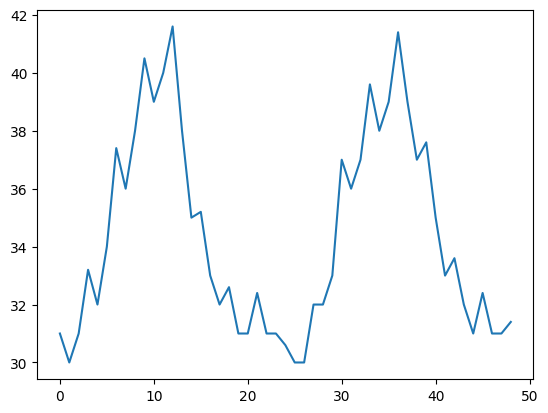

In [130]:
plt.plot(next_6_months_temp.values.flatten())

In [131]:
location = Point( 23.0215374, 72.5800568)
start = datetime.datetime(2024, 5, 26)
end = datetime.datetime(2024, 5, 31)

# Get historical data
data_for_model = Hourly(location, start, end)
data_for_model = data_for_model.fetch()

print(data_for_model)


                     temp  dwpt  rhum  prcp  snow   wdir  wspd  wpgt    pres  \
time                                                                           
2024-05-26 00:00:00  32.4  20.3  49.0   0.0   NaN  290.0   5.4   NaN  1001.5   
2024-05-26 01:00:00  31.0  20.9  55.0   0.0   NaN  240.0  14.8   NaN  1002.0   
2024-05-26 02:00:00  30.0  23.0  66.0   0.0   NaN  230.0  18.4   NaN  1003.0   
2024-05-26 03:00:00  32.0  24.6  65.0   0.0   NaN  230.0   5.4   NaN  1003.1   
2024-05-26 04:00:00  33.0  23.1  56.0   0.0   NaN  250.0  18.4   NaN  1004.0   
...                   ...   ...   ...   ...   ...    ...   ...   ...     ...   
2024-05-30 20:00:00  32.0  25.1  67.0   0.0   NaN  240.0  14.8   NaN  1003.0   
2024-05-30 21:00:00  32.4  25.7  68.0   0.0   NaN  320.0   3.6   NaN  1003.2   
2024-05-30 22:00:00  31.0  23.9  66.0   0.0   NaN  210.0  22.3   NaN  1003.0   
2024-05-30 23:00:00  30.0  21.9  62.0   0.0   NaN  200.0  22.3   NaN  1004.0   
2024-05-31 00:00:00  31.6  24.2  65.0   

In [132]:
data_for_model["temp"].values[21:].shape

(100,)

In [133]:
data_for_model=MinMax.transform(np.array(data_for_model["temp"].values[2).reshape(-1,1))


In [134]:
data_for_model=data_for_model.reshape(1,100,1)

In [135]:
data_for_model=data_for_model.flatten()
data_for_model

array([0.82063866, 0.51072005, 0.35576075, 0.82063866, 0.20080145,
       0.35576075, 0.66567936, 0.82063866, 0.82063866, 1.59543518,
       1.59543518, 2.06031308, 2.46320727, 2.37023169, 2.37023169,
       2.6801503 , 1.44047587, 1.13055727, 1.09956541, 0.82063866,
       0.66567936, 0.91361424, 0.66567936, 0.51072005, 0.60369564,
       0.35576075, 0.35576075, 0.41774447, 0.20080145, 0.35576075,
       0.66567936, 0.66567936, 0.82063866, 1.44047587, 1.44047587,
       1.59543518, 2.27725611, 2.06031308, 2.21527239, 2.43221541,
       1.44047587, 1.13055727, 0.97559796, 0.66567936, 0.66567936,
       0.91361424, 0.82063866, 0.66567936, 0.66567936, 0.51072005,
       0.35576075, 0.41774447, 0.20080145, 0.20080145, 0.66567936,
       0.66567936, 0.97559796, 1.28551657, 1.44047587, 1.59543518,
       2.12229681, 1.90535378, 1.90535378, 1.84337006, 1.28551657,
       0.97559796, 0.97559796, 0.66567936, 0.66567936, 0.85163052,
       0.66567936, 0.51072005, 0.72766308, 0.51072005, 0.35576

In [75]:
copied=data_for_model.copy()
copied=copied[1:]
copied = np.append(copied, 1.2)
copied

array([-1.01036587, -1.11302757, -1.05143055, -0.74344547, -0.41492805,
       -0.35333103, -0.04534595,  0.24210679, -0.41492805, -1.52367434,
       -1.40048031, -1.09249523, -0.82557483, -0.5997191 , -0.49705741,
       -0.41492805, -0.27120168, -0.00428128,  0.0367834 , -0.12747531,
       -0.08641063, -0.14800765, -0.04534595,  0.28317147,  0.28317147,
        0.09838042,  0.36530082,  0.38583316,  0.28317147,  0.52955953,
        0.44743018,  0.63222122,  0.7759476 ,  1.00180332,  1.042868  ,
        0.81701227,  0.50902719,  0.36530082,  0.46796251,  0.52955953,
        0.55009187,  0.52955953,  0.61168889,  0.73488292,  0.65275356,
        0.94020631,  0.98127098,  1.12499735,  0.96073864,  0.85807695,
        0.71435058,  0.79647993,  0.98127098,  1.12499735,  1.33032074,
        1.45351477,  1.042868  ,  0.71435058,  0.73488292,  0.87860929,
        0.96073864,  1.18659437,  1.26872373,  1.10446502,  1.06340034,
        1.18659437,  1.26872373,  1.14552969,  1.042868  ,  1.04

In [136]:
output=[]
for i in range(30):
    print(data_for_model)

    prediction = best_model.predict(np.array(data_for_model).reshape(-1, window_size, 1))
    
    output.append(prediction)
    data_for_model = np.append(data_for_model[1:], prediction)

[0.82063866 0.51072005 0.35576075 0.82063866 0.20080145 0.35576075
 0.66567936 0.82063866 0.82063866 1.59543518 1.59543518 2.06031308
 2.46320727 2.37023169 2.37023169 2.6801503  1.44047587 1.13055727
 1.09956541 0.82063866 0.66567936 0.91361424 0.66567936 0.51072005
 0.60369564 0.35576075 0.35576075 0.41774447 0.20080145 0.35576075
 0.66567936 0.66567936 0.82063866 1.44047587 1.44047587 1.59543518
 2.27725611 2.06031308 2.21527239 2.43221541 1.44047587 1.13055727
 0.97559796 0.66567936 0.66567936 0.91361424 0.82063866 0.66567936
 0.66567936 0.51072005 0.35576075 0.41774447 0.20080145 0.20080145
 0.66567936 0.66567936 0.97559796 1.28551657 1.44047587 1.59543518
 2.12229681 1.90535378 1.90535378 1.84337006 1.28551657 0.97559796
 0.97559796 0.66567936 0.66567936 0.85163052 0.66567936 0.51072005
 0.72766308 0.51072005 0.35576075 0.57270378 0.35576075 0.35576075
 0.69667122 0.66567936 0.82063866 1.34750029 1.28551657 1.59543518
 2.06031308 1.90535378 2.06031308 2.37023169 1.59543518 1.1305

In [137]:
next_6_months_temp=list(next_6_months_temp.values)

In [138]:
next_6_months_temp=next_6_months_temp[:30]

In [139]:
print("Len Output:",len(output))
print("Len next_6_months_temp:",len(next_6_months_temp))


Len Output: 30
Len next_6_months_temp: 30


In [302]:
list(np.array(output).flatten())

[42.26219,
 43.584137,
 43.63522,
 43.651714,
 43.65484,
 43.41555,
 43.422462,
 43.423683,
 43.413635,
 43.61869,
 43.50193,
 43.36956,
 43.212875,
 43.339005,
 43.33207,
 43.325966,
 43.320354,
 43.31549,
 43.31143,
 43.308105,
 43.3054,
 43.30322,
 43.301453,
 43.30001,
 43.298832,
 43.297867,
 43.297073,
 43.296406,
 43.295853,
 43.295387]

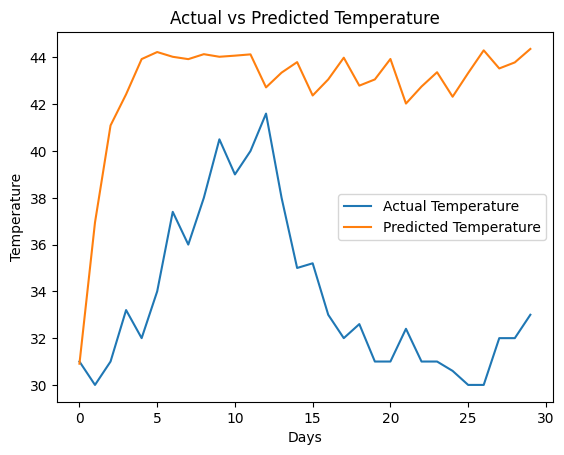

In [140]:

# Plot the two arrays
import matplotlib.pyplot as plt

plt.plot(list(next_6_months_temp), label="Actual Temperature")
plt.plot(list(np.array(output).flatten()), label="Predicted Temperature")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Temperature")
plt.title("Actual vs Predicted Temperature")
plt.show()


In [141]:
from sklearn.metrics import r2_score,mean_squared_error
mean_squared_error(list(next_6_months_temp),list(np.array(output).flatten()))

93.58702010380271

In [142]:
y_prediction_x=best_model.predict(np.array(X_test).reshape(-1,window_size,1))

1384/1384 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step


In [75]:
len(y_prediction_x)

44265

In [44]:
y_pred_final=[]
for i in y_prediction_x:
  # print(i)
  y_pred_final.append(MinMax.inverse_transform(i.reshape(-1,1))[0,0])


In [779]:
y_true_final=[]

for i in Y_test:
  # print(i)
  y_true_final.append(MinMax_Loaded.inverse_transform(np.array(i).reshape(-1,1))[0,0])


In [850]:
y_true_final[0], y_pred_final[0], Y_test[0],y_prediction_x[0]

(28.4, 164.64227, 28.4, array([28.154232], dtype=float32))

In [730]:
len(y_true_final)

3028

In [306]:
mean_squared_error(y_true_final,y_pred_final)

NameError: name 'y_true_final' is not defined

In [143]:
mean_squared_error(Y_test,y_prediction_x)

1.9910862400166045

In [386]:
len(y_true_final)

3028

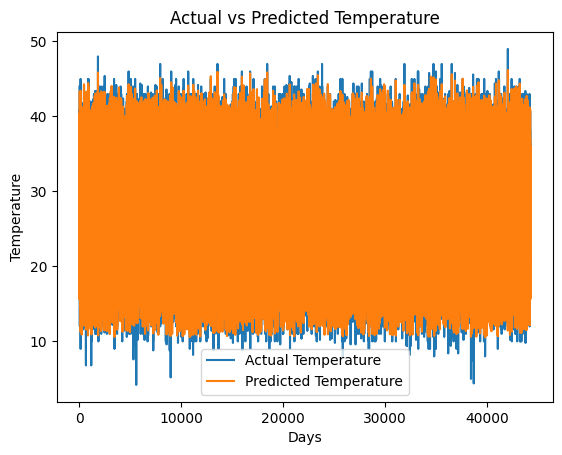

In [144]:


# Plot the two arrays
import matplotlib.pyplot as plt

plt.plot(Y_test, label="Actual Temperature")
plt.plot(y_prediction_x, label="Predicted Temperature")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Temperature")
plt.title("Actual vs Predicted Temperature")
plt.show()


In [145]:
import pickle as pkl

pkl.dump(MinMax,open("StandardScaler_hourly.pkl",'wb'))

In [66]:
MinMax_Loaded=pkl.load(open("/kaggle/working/MinMax_Avg.pkl","rb"))

# EVALUTION 

In [146]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,median_absolute_error


In [147]:
def model_evaluation(y_true, y_pred):
    """Compute evaluation metrics."""
    mse = mean_squared_error(y_true, y_pred)
    mae=mean_absolute_error(y_true,y_pred)
    medianae=median_absolute_error(y_true,y_pred)
    
    
    metrics = {
        "Mean Sqaured Error": mse,
        "Mean Absolute Error": mae,
        "Median Absolute Error": medianae
    }
    return metrics

In [148]:
def display_metrics(metrics, save_path=None):
    """Stylishly display metrics using Matplotlib and optionally save the plot."""
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.barh(list(metrics.keys()), list(metrics.values()), color="skyblue")
    ax.set_title("Model Evaluation Metrics", fontsize=16, fontweight="bold")
    ax.set_xlabel("Scores", fontsize=12)
    ax.set_xlim(0, 4)
    for i, v in enumerate(metrics.values()):
        ax.text(v + 0.01, i, f"{v:.2f}", color="black", va="center", fontsize=10)
    plt.tight_layout()
    
    # Save the plot if a save path is provided
    if save_path:
        fig.savefig(save_path, dpi=300, bbox_inches="tight")
        print(f"Metrics plot saved to {save_path}")
    plt.show()

In [149]:
y_prediction_x=best_model.predict(np.array(X_test).reshape(-1,window_size,1))

1384/1384 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step


Metrics plot saved to Model_Evalution_Metrics.png


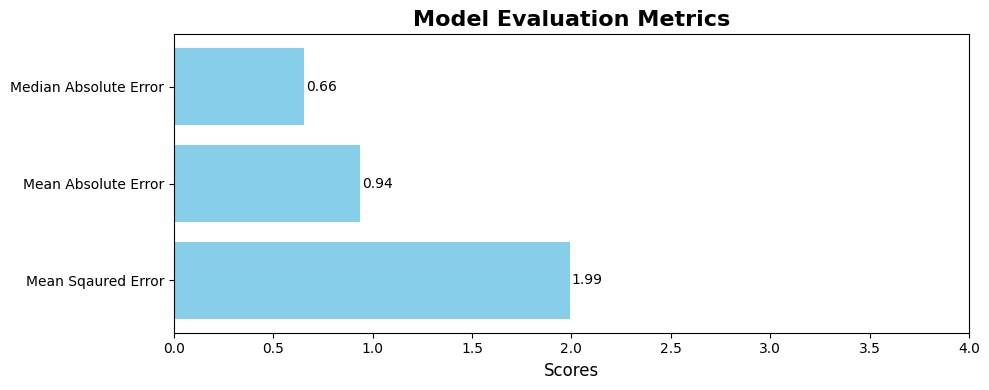

In [150]:
display_metrics(model_evaluation(Y_test,y_prediction_x),"Model_Evalution_Metrics.png")

In [152]:
r2_score(Y_test,y_prediction_x)

0.9523115760275177

## ALL MODEL EVALUTION

In [153]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,median_absolute_error


In [160]:
from meteostat import Point, Hourly
import datetime

def prepare_data(feature,scaler):    
    location = Point( 23.0215374, 72.5800568)
    start = datetime.datetime(1990, 6, 1)
    end = datetime.datetime(2024, 6, 1)
    
    # Get historical data
    data = Hourly(location, start, end)
    data = data.fetch()
    
    
    temperature_avg=data[feature]
    print("TOTAL NULL VALUES IN DATASET:",temperature_avg.isnull().sum())
    temperature_avg.dropna(inplace=True)
    
    temperature_avg_seq=temperature_avg.values
    print(temperature_avg_seq,temperature_avg_seq.shape)
    
    
    
    window_size=100
    
    X=[]
    Y=[]
    for i in range(len(temperature_avg_seq)-window_size):
      X.append(temperature_avg_seq[i:i+window_size])
      Y.append(temperature_avg_seq[i+window_size])
    
    X=np.array(X)
    Y=np.array(Y)

    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

    print("X_train Shape",X_train.shape)
    print("X_test Shape",X_test.shape)
    print("Y_train Shape",Y_train.shape)
    print("Y_test Shape",Y_test.shape)


    X_train_Scaled=scaler.transform(X_train.reshape(-1,1))
    X_test_Scaled=scaler.transform(X_test.reshape(-1,1))

    X_train=X_train_Scaled.reshape(X_train.shape[0],100)
    X_test=X_test_Scaled.reshape(X_test.shape[0],100)

    
    print("AFTER SCALED")
    print("X_train Shape",X_train.shape)
    print("X_test Shape",X_test.shape)
    print("Y_train Shape",Y_train.shape)
    print("Y_test Shape",Y_test.shape)
    




    
    return X_train,X_test,Y_train,Y_test

In [155]:
def model_evaluation(y_true, y_pred):
    """Compute evaluation metrics."""
    mse = mean_squared_error(y_true, y_pred)
    mae=mean_absolute_error(y_true,y_pred)
    medianae=median_absolute_error(y_true,y_pred)
    
    
    metrics = {
        "Mean Sqaured Error": mse,
        "Mean Absolute Error": mae,
        "Median Absolute Error": medianae
    }
    return metrics

In [156]:

def display_all_metrics(metrics_dicts, features):
   
    fig, ax = plt.subplots(figsize=(12, 6))
 
    num_groups = len(metrics_dicts)
    bar_width = 0.15
    indices = np.arange(len(metrics_dicts[0])) 
    
    
    for i, (metrics, feature) in enumerate(zip(metrics_dicts, features)):
        bar_positions = indices + i * bar_width
        ax.barh(bar_positions, list(metrics.values()), bar_width, label=feature)
 
        for j, v in enumerate(metrics.values()):
            ax.text(v + 0.01, bar_positions[j], f"{v:.2f}", va="center", fontsize=9)
    
 
    ax.set_title("Model Evaluation Metrics", fontsize=16, fontweight="bold")
    ax.set_xlabel("Scores", fontsize=12)
    ax.set_xlim(0, 4) 
    ax.set_yticks(indices + (num_groups - 1) * bar_width / 2)
    ax.set_yticklabels(metrics_dicts[0].keys(), fontsize=10)
    ax.legend(loc="best", title="Feature Sets", fontsize=10)
    
    plt.tight_layout()
    plt.show()


## 1. TEMPERATURE 

## MIN MAX SCALER

In [157]:
from tensorflow.keras.models import load_model
best_model=load_model("/kaggle/working/temperature_best_MinMax_Hourly.keras")
# best_model.save("upgraded_naive_model_best_avg.h5")


In [158]:
MinMax_Avg=pkl.load(open("/kaggle/working/MinMaxScaler_avg_hourly.pkl","rb"))

In [161]:
X_train,X_test,Y_train,Y_test=prepare_data("temp",MinMax_Avg)

TOTAL NULL VALUES IN DATASET: 150410
[25.4 29.4 33.4 ... 31.  30.  31. ] (147647,)
X_train Shape (103282, 100)
X_test Shape (44265, 100)
Y_train Shape (103282,)
Y_test Shape (44265,)
AFTER SCALED
X_train Shape (103282, 100)
X_test Shape (44265, 100)
Y_train Shape (103282,)
Y_test Shape (44265,)


In [162]:
y_prediction_x=best_model.predict(np.array(X_test).reshape(-1,window_size,1))

1384/1384 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step


In [538]:
y_prediction_x[0],Y_test[0]

(array([28.638676], dtype=float32), 29.3)

In [163]:
from sklearn.metrics import mean_squared_error
print("MEAN SQAURED ERROR:",mean_squared_error(Y_test,y_prediction_x))

temp_avg_minmax=model_evaluation(Y_test,y_prediction_x)

MEAN SQAURED ERROR: 2.0569216010734004


## STANDARD SCALER

In [164]:
from tensorflow.keras.models import load_model
best_model=load_model("/kaggle/working/temperature_best_Standard_Hourly.keras")
# best_model.save("upgraded_naive_model_best_avg.h5")


In [165]:
Standard_Avg=pkl.load(open("/kaggle/working/StandardScaler_hourly.pkl","rb"))

In [167]:
X_train,X_test,Y_train,Y_test=prepare_data("temp",Standard_Avg)

TOTAL NULL VALUES IN DATASET: 150410
[25.4 29.4 33.4 ... 31.  30.  31. ] (147647,)
X_train Shape (103282, 100)
X_test Shape (44265, 100)
Y_train Shape (103282,)
Y_test Shape (44265,)
AFTER SCALED
X_train Shape (103282, 100)
X_test Shape (44265, 100)
Y_train Shape (103282,)
Y_test Shape (44265,)


In [168]:
y_prediction_x=best_model.predict(np.array(X_test).reshape(-1,window_size,1))

1384/1384 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step


In [169]:
from sklearn.metrics import mean_squared_error
print("MEAN SQAURED ERROR:",mean_squared_error(Y_test,y_prediction_x))


temp_avg_Standard=model_evaluation(Y_test,y_prediction_x)

MEAN SQAURED ERROR: 1.9910862400166045


## VISUAL

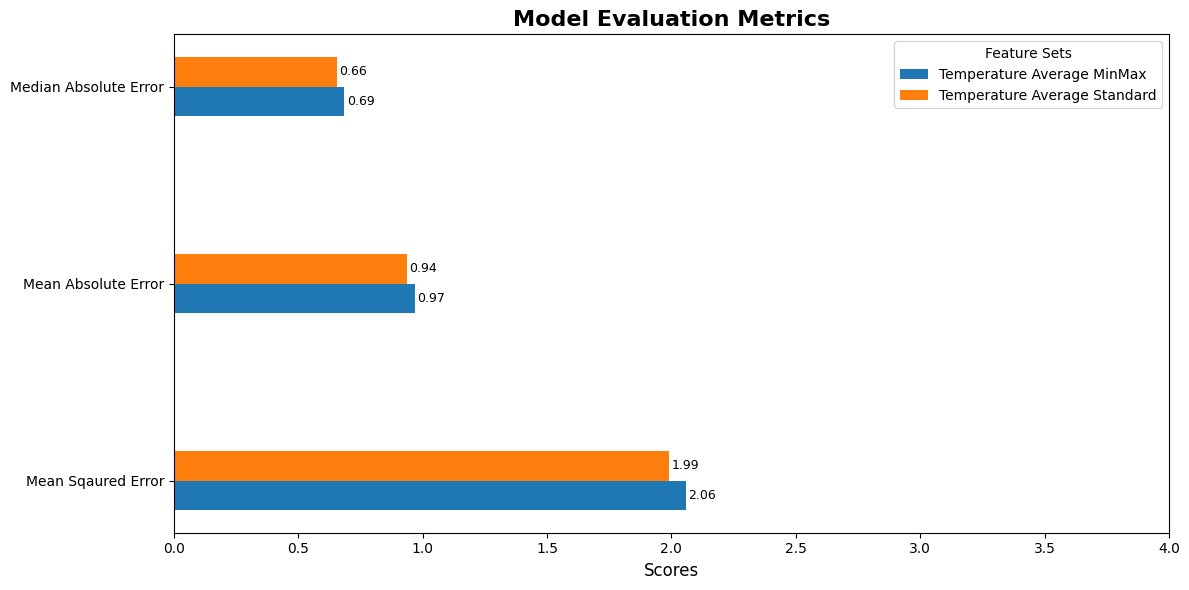

In [170]:
metrics_dicts = [
    temp_avg_minmax, temp_avg_Standard,
]
features = [
    "Temperature Average MinMax", "Temperature Average Standard",
]

# Display all metrics in a single plot
display_all_metrics(metrics_dicts, features)

 <h1 style="text-align:center;">END</h1>

---